In [2]:
import numpy as np
import pandas as pd

In [3]:
#reading the data

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


$TV$ $Radio$ $Newspaper$ are predictor variables. $Sales$ is the target variable

In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# vizualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

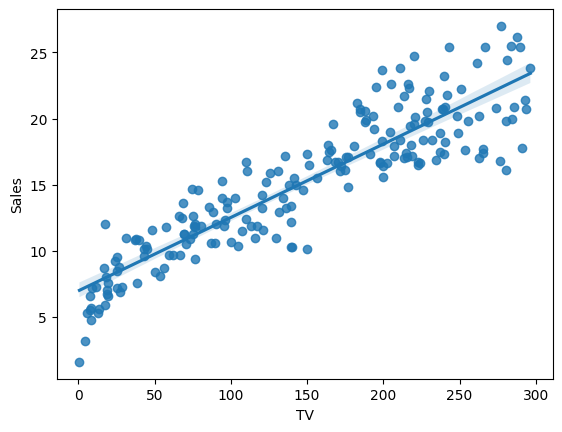

In [8]:
sns.regplot(x='TV', y='Sales', data=advertising)

<Axes: xlabel='Radio', ylabel='Sales'>

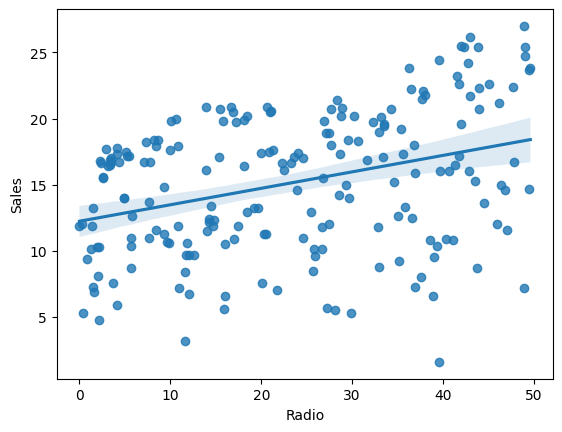

In [9]:
sns.regplot(x='Radio', y= 'Sales' , data=advertising)

<Axes: xlabel='Newspaper', ylabel='Sales'>

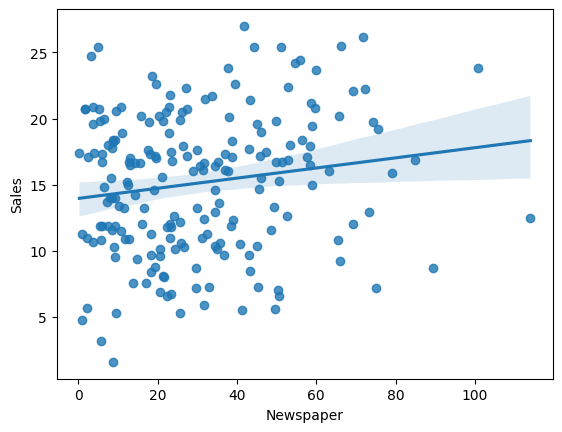

In [10]:
sns.regplot(x='Newspaper',y='Sales', data=advertising)

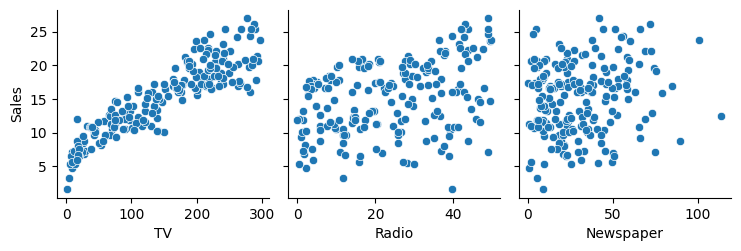

In [11]:
  sns.pairplot(data=advertising,
               x_vars=['TV','Radio','Newspaper'],
               y_vars='Sales')


We see more linear relation between $TV$ and $Sales$

Lets us check the same with heatmap

In [12]:
corr= advertising.corr()
corr.mean()

TV           0.503166
Radio        0.439636
Newspaper    0.392178
Sales        0.602200
dtype: float64

<Axes: >

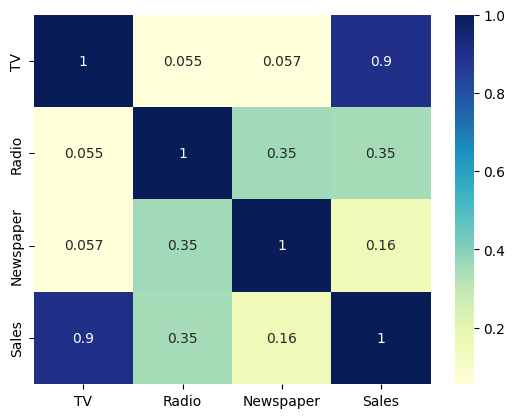

In [13]:
colosr= sns.color_palette("crest", as_cmap=True)
sns.heatmap(advertising.corr(),annot=True,cmap="YlGnBu")

### Hypothesis
Null Hypothesis (
H
0
):
β
1
=
0

Alternate Hypothesis (
H
A
):
β
1
≠
0

Compute X T-score ⬇

$ (X - μ )/ ( s / √n) $

Here we have

$y = c + mi*TV$

m is the model parameter


In [17]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

  ## Steps for Linear regression
  - Calculate x and y
  - Divide the dataset into train and test set
  - Train the model on train set (learn the coefficients)
  - Evaluate model model (on train and test)


In [23]:
X = advertising['TV']
y = advertising['Sales']

#train test split

X_train,X_test,y_train,  y_test = train_test_split(X,y, train_size = .75, random_state=100)


In [25]:
# training the model usings stats model. In stats modelit does not contain the definition of the intercept. it ony includes the coefficient of the predictor variable.

# hence e add intercept explicitly
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()
# the modelis y = c.const + m1* TV

,const,TV
40,1.0,202.5
153,1.0,171.3
115,1.0,75.1
64,1.0,131.1
59,1.0,210.7


In [26]:
#fitting the model
# Ordinary least square. We minimize OLS
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    7.00822
TV       0.05425
dtype: float64

here the lr_fit models

y = 7.00822 + 0.05425*TV


In [27]:
lr_model.summary()
# This detailed summary is only got through statsmodels and not sklearn

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     666.4
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           1.14e-56
Time:                        14:28:33   Log-Likelihood:                -340.57
No. Observations:                 150   AIC:                             685.1
Df Residuals:                     148   BIC:                             691.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0082      0.362     19.382      0.000       6.294       7.723
TV             0.0542      0.002     25.814      0.000       0.050       0.058
==============================================================================
Omnibus:                        0.006   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.042
Skew:                          -0.011   Prob(JB):                        0.979
Kurtosis:                       2.921   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see that the p value is low forboth the coefficiets. Hence this proves that the coefficients are statistically significant

Also R^2 value is 81% therefore 81% of varience in sales can be predicted by TV advertisement

Also, f stats show that fit of the lr is not purely by chance (that is a low f stats value)


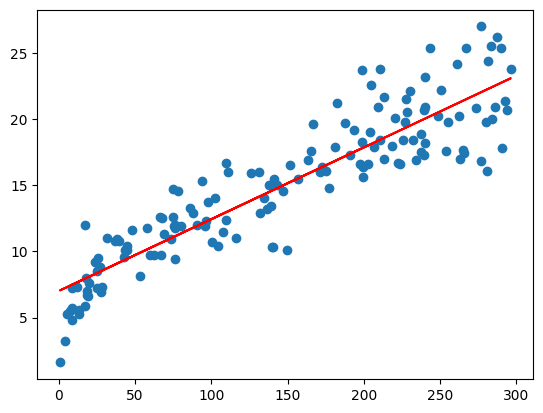

In [36]:
# plotting predictions of the model

y_train_pred = lr_model.predict(X_train_sm)
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train_pred, color='red')
plt.show()

## Step 3 : Residual Analysis

Distribution of error terms

In [33]:
#We plot the resual values (it is a  step in linear regression)  --- > Since we make an assumption that the residual is normally distributed
 # y_train, y_train_pred. Error = f(y_train,tra_train_pred)

y_train_pred.head()

40     17.993828
153    16.301231
115    11.082389
64     14.120384
59     18.438677
dtype: float64

Text(0.5, 1.0, 'Residual plot')

<Figure size 640x480 with 0 Axes>

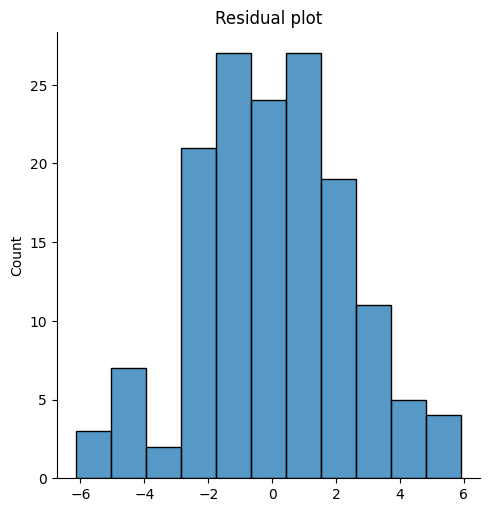

In [34]:
res = y_train-y_train_pred
plt.figure()
sns.displot(res)
plt.title("Residual plot")

The residuals are following a normal distribution.

Patterns in the residuals also give a overview of data. there sould not be any pattern in the residuals

We assert with the linear regression assumptions based on this.

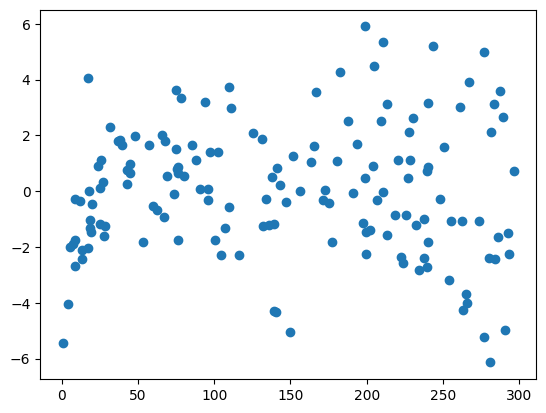

In [37]:
plt.scatter(X_train,res)

We see that the residuals are scattered with no particular pattern. They are scattered around y = 0


# Evaluating the model

- Make predictions on X_test
- Evaualte the predicted results

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [46]:
print(r2_score(y_true=y_train, y_pred = y_train_pred))
print(r2_score(y_true=y_test, y_pred = y_test_pred))

0.8182648087707635
0.7723404266389128


In [48]:
print(mean_squared_error(y_true=y_train, y_pred = y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred = y_test_pred))

5.491046335600161
4.525508063101037


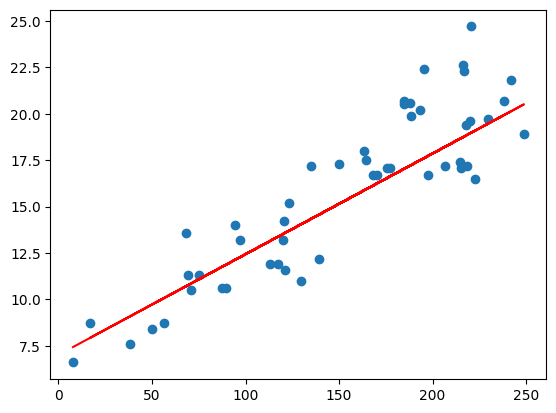

In [49]:
# plotting predictions of the model

y_train_pred = lr_model.predict(X_train_sm)
plt.scatter(X_test,y_test)
plt.plot(X_test, y_test_pred, color='red')
plt.show()

In [ ]:
 #Train test split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,  y_test = train_test_split(X,y, train_size = .75, random_state=100)

#object of class

lm = LinearRegression()

# fit the model
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

# Regression using sklearn

It is the goto package for Machine Learning

## Steps in sklearn model building
- create an object of linear regression type
- fit the model in the object (.fit on model instance)
- see params, make predictions using the model
- evaluate the model

In [53]:
# Fitting

lm.fit(X_train_lm,y_train)

LinearRegression()

In [56]:
print(lm.coef_)
print(lm.intercept_)

[0.05424992]
7.008220067891467


Same as statsmodels parameter values

In [57]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [61]:
# Evaluating the model
print("Training set result :", r2_score(y_true=y_train,y_pred= y_train_pred))
print("Test set result :", r2_score(y_true=y_test,y_pred= y_test_pred))

Training set result : 0.8182648087707635
Test set result : 0.7723404266389124
